In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

Welcome to JupyROOT 6.24/06


In [2]:
file = ROOT.TFile.Open("run3BtoM_4hcopy_ratioFR_cov_mat_0.root")
#direc = file.Get("QFillByFillAnalyzerDB")
hist = ROOT.TH1D()
hist = file.Get("calo_histogram_sum_ratio")
hcov = ROOT.TH2D()
hcov = file.Get("hcov")

In [3]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [4]:
fit_start=30000
fit_stop=300000


T_a_true=4365.411
nbinshift=int((0.5*T_a_true)/hist.GetBinWidth(1))
T_a=2*nbinshift*hist.GetBinWidth(1)

asym=np.empty(75)
dasym=np.empty(75)
rval=np.empty(75)
drval=np.empty(75)
phi=np.empty(75)
dphi=np.empty(75)
A_cbo=np.empty(75)
dA_cbo=np.empty(75)
tau_cbo=np.empty(75)
dtau_cbo=np.empty(75)
omega_cbo=np.empty(75)
domega_cbo=np.empty(75)
phi_cbo=np.empty(75)
dphi_cbo=np.empty(75)
A_cbo_A=np.empty(75)
dA_cbo_A=np.empty(75)
phi_cbo_A=np.empty(75)
dphi_cbo_A=np.empty(75)
A_cbo_phi=np.empty(75)
dA_cbo_phi=np.empty(75)
phi_cbo_phi=np.empty(75)
dphi_cbo_phi=np.empty(75)
A_vw=np.empty(75)
dA_vw=np.empty(75)
tau_vw=np.empty(75)
dtau_vw=np.empty(75)
omega_vw=np.empty(75)
domega_vw=np.empty(75)
phi_vw=np.empty(75)
dphi_vw=np.empty(75)
A_y=np.empty(75)
dA_y=np.empty(75)
tau_y=np.empty(75)
dtau_y=np.empty(75)
omega_y=np.empty(75)
domega_y=np.empty(75)
phi_y=np.empty(75)
dphi_y=np.empty(75)
A_2cbo=np.empty(75)
dA_2cbo=np.empty(75)
tau_2cbo=np.empty(75)
dtau_2cbo=np.empty(75)
omega_2cbo=np.empty(75)
domega_2cbo=np.empty(75)
phi_2cbo=np.empty(75)
dphi_2cbo=np.empty(75)

fit_st=np.empty(75)

kband1p=np.empty(75)
kband1m=np.empty(75)
kband2p=np.empty(75)
kband2m=np.empty(75)
kband3p=np.empty(75)
kband3m=np.empty(75)
kband4p=np.empty(75)
kband4m=np.empty(75)
kband5p=np.empty(75)
kband5m=np.empty(75)
kband6p=np.empty(75)
kband6m=np.empty(75)
kband7p=np.empty(75)
kband7m=np.empty(75)
kband8p=np.empty(75)
kband8m=np.empty(75)
kband9p=np.empty(75)
kband9m=np.empty(75)
kband10p=np.empty(75)
kband10m=np.empty(75)
kband11p=np.empty(75)
kband11m=np.empty(75)
kband12p=np.empty(75)
kband12m=np.empty(75)
kband13p=np.empty(75)
kband13m=np.empty(75)
kband14p=np.empty(75)
kband14m=np.empty(75)
kband15p=np.empty(75)
kband15m=np.empty(75)
kband16p=np.empty(75)
kband16m=np.empty(75)
kband17p=np.empty(75)
kband17m=np.empty(75)
kband18p=np.empty(75)
kband18m=np.empty(75)
kband19p=np.empty(75)
kband19m=np.empty(75)
kband20p=np.empty(75)
kband20m=np.empty(75)
kband21p=np.empty(75)
kband21m=np.empty(75)
kband22p=np.empty(75)
kband22m=np.empty(75)
kband23p=np.empty(75)
kband23m=np.empty(75)


In [5]:
def fit_func(time: np.double,
             asym: np.double = 0.0, 
             R: np.double = 0.0, 
             phi: np.double = 0.0,
             asym_cbo = 0.0,
             tau_cbo = 0.0,
             omega_cbo = 0.0,
             phi_cbo = 0.0,
             asym_cbo_A = 0.0,
             phi_cbo_A=0.0,
             A_cbo_phi= 0.0,
             phi_cbo_phi=0.0,
             asym_vw= 0.0,
             tau_vw = 0.0,
             omega_vw = 0.0,
             phi_vw = 0.0,
             asym_vbo= 0.0,
             tau_vbo = 0.0,
             omega_vbo = 0.0,
             phi_vbo = 0.0,
             asym_2cbo= 0.0,
             phi_2cbo = 0.0,
             A_cbot = 0.0)-> np.double:
    
    tau_cbot = 23100
    
    omega_cbot=omega_cbo*(1+A_cbot*exp(-time/tau_cbot))
    omega_cbotf=omega_cbo*(1+A_cbot*exp(-(time+T_a/2)/tau_cbot))
    omega_cbotb=omega_cbo*(1+A_cbot*exp(-(time-T_a/2)/tau_cbot))
    
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    N2cbo=(asym_2cbo*exp(-2*time/tau_cbo)*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-2*(time + T_a/2)/tau_cbo)*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-2*(time - T_a/2)/tau_cbo)*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    
    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [6]:
p_init=[2.28839e-01,
        0.000000,
        4.02000e+00,
        2.42604e-03,
        2.54062e+05,
        2.330e-03,
        5.56481e-01,
        6.91318e-04,
        -5.78075e+00,
        6.39026e-05,
        3.52887e+01,
        2.36536e-04,
        1.38419e+05,
        1.389e-02,
        2.73495e-01,
        -1.00112e-03,
        3.48295e+04,
        1.407e-02,
        -1.99555e+01,
        1.10668e-04,
        3.06805e+00,
        0.0047]

In [7]:
fit_range=hist.FindBin(fit_stop)-hist.FindBin(fit_start)+1
y_val=np.empty(fit_range)
y_err=np.empty(fit_range)
x_val=np.empty(fit_range)
y_cov = np.empty(shape=(fit_range,fit_range))
    
for ibin in range (0,fit_range):
    y_val[ibin]=hist.GetBinContent(ibin+hist.FindBin(fit_start))
    y_err[ibin]=hist.GetBinError(ibin+hist.FindBin(fit_start))
    x_val[ibin]=hist.GetBinCenter(ibin+hist.FindBin(fit_start))
        
for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[irow][icol]=hcov.GetBinContent(irow+hist.FindBin(fit_start),icol+hist.FindBin(fit_start))
            
pars2, cov2 = opt.curve_fit(f=fit_func, xdata=x_val, ydata=y_val, p0=p_init, sigma=y_err)
 
p_init=pars2

In [8]:
pars2

array([ 2.29386131e-01, -3.53383699e+01,  4.02336043e+00,  1.96422085e-03,
        2.38318568e+05,  2.32951696e-03, -4.54212456e-01,  5.71107216e-04,
       -6.35217244e+00, -6.86634590e-05,  3.54012288e+01,  4.34202596e-04,
        9.20830329e+04,  1.38925823e-02, -2.35824278e-01, -2.77637207e-03,
        1.78996597e+04,  1.40926063e-02, -1.91458221e+01,  1.13280923e-04,
        3.23215874e+00,  3.95516163e-03])

In [9]:
%%time
for ist in range (0,75):
    fit_range=hist.FindBin(fit_stop)-hist.FindBin(fit_start)+1
    y_val=np.empty(fit_range)
    y_err=np.empty(fit_range)
    x_val=np.empty(fit_range)
    y_cov = np.empty(shape=(fit_range,fit_range))
    
    for ibin in range (0,fit_range):
        y_val[ibin]=hist.GetBinContent(ibin+hist.FindBin(fit_start))
        y_err[ibin]=hist.GetBinError(ibin+hist.FindBin(fit_start))
        x_val[ibin]=hist.GetBinCenter(ibin+hist.FindBin(fit_start))
        
    for irow in range (0, fit_range):
        for icol in range(0, fit_range):
            y_cov[irow][icol]=hcov.GetBinContent(irow+hist.FindBin(fit_start),icol+hist.FindBin(fit_start))
         
    pars, cov = opt.curve_fit(f=fit_func, xdata=x_val, ydata=y_val, p0=p_init, sigma=y_cov)  
    
    stdevs=np.sqrt(np.diag(cov))
    
    fit_st[ist]=fit_start
    
    asym[ist]=pars[0]
    dasym[ist]=stdevs[0]
    rval[ist]=pars[1]
    drval[ist]=stdevs[1]
    phi[ist]=pars[2]
    dphi[ist]=stdevs[2]
    A_cbo[ist]=pars[3]
    dA_cbo[ist]=stdevs[3]
    tau_cbo[ist]=pars[4]
    dtau_cbo[ist]=stdevs[4]
    omega_cbo[ist]=pars[5]
    domega_cbo[ist]=stdevs[5]
    phi_cbo[ist]=pars[6]
    dphi_cbo[ist]=stdevs[6]
    A_cbo_A[ist]=pars[7]
    dA_cbo_A[ist]=stdevs[7]
    phi_cbo_A[ist]=pars[8]
    dphi_cbo_A[ist]=stdevs[8]
    A_cbo_phi[ist]=pars[9]
    dA_cbo_phi[ist]=stdevs[9]
    phi_cbo_phi[ist]=pars[10]
    dphi_cbo_phi[ist]=stdevs[10]
    A_y[ist]=pars[11]
    dA_y[ist]=stdevs[11]
    tau_y[ist]=pars[12]
    dtau_y[ist]=stdevs[12]
    omega_y[ist]=pars[13]
    domega_y[ist]=stdevs[13]
    phi_y[ist]=pars[14]
    dphi_y[ist]=stdevs[14]
    A_vw[ist]=pars[15]
    dA_vw[ist]=stdevs[15]
    tau_vw[ist]=pars[16]
    dtau_vw[ist]=stdevs[16]
    omega_vw[ist]=pars[17]
    domega_vw[ist]=stdevs[17]
    phi_vw[ist]=pars[18]
    dphi_vw[ist]=stdevs[18]
    A_2cbo[ist]=pars[19]
    dA_2cbo[ist]=stdevs[19]
    #tau_2cbo[ist]=pars[20]
    #dtau_2cbo[ist]=stdevs[20]
    #omega_2cbo[ist]=pars[21]
    #domega_2cbo[ist]=stdevs[21]
    phi_2cbo[ist]=pars[20]
    dphi_2cbo[ist]=stdevs[20]


    
    p_init=pars  
    
    fit_start=fit_start+1000

CPU times: user 10min 10s, sys: 2min 41s, total: 12min 51s
Wall time: 10min 19s


In [10]:
for icalo in range(0,75):
    while phi_cbo[icalo] < 0:
        phi_cbo[icalo] = phi_cbo[icalo] + 6.28
    while phi_y[icalo] < 0:
        phi_y[icalo] = phi_y[icalo] + 6.28
    while phi_vw[icalo] < 0:
        phi_vw[icalo] = phi_vw[icalo] + 6.28
    while phi_cbo[icalo] > 6.28:
        phi_cbo[icalo] = phi_cbo[icalo] - 6.28
    while phi_y[icalo] > 6.28:
        phi_y[icalo] = phi_y[icalo] - 6.28
    while phi_vw[icalo] > 6.28:
        phi_vw[icalo] = phi_vw[icalo] - 6.28
    A_cbo[icalo] = np.abs(A_cbo[icalo])
    A_y[icalo] = np.abs(A_y[icalo])
    A_vw[icalo] = np.abs(A_vw[icalo])

In [11]:
stdevs

array([1.21011471e-05, 8.02031282e-01, 1.89676711e-04, 8.84034502e-05,
       2.00653253e+04, 5.85290687e-07, 1.11154550e-01, 1.42061844e-04,
       1.72401141e-01, 1.38155712e-04, 1.92558272e+00, 1.61305051e-04,
       5.61809706e+04, 4.07906633e-06, 5.62504351e-01, 2.50240430e-04,
       1.02507958e+05, 1.27808752e-05, 1.69950042e+00, 4.35912396e-05,
       2.22503302e-01, 2.65621108e-02])

In [12]:
kband1p[0]=asym[0]
kband1m[0]=asym[0]
kband2p[0]=rval[0]
kband2m[0]=rval[0]
kband3p[0]=phi[0]
kband3m[0]=phi[0]
kband4p[0]=A_cbo[0]
kband4m[0]=A_cbo[0]
kband5p[0]=tau_cbo[0]
kband5m[0]=tau_cbo[0]
kband6p[0]=omega_cbo[0]
kband6m[0]=omega_cbo[0]
kband7p[0]=phi_cbo[0]
kband7m[0]=phi_cbo[0]
kband8p[0]=A_cbo_A[0]
kband8m[0]=A_cbo_A[0]
kband9p[0]=phi_cbo_A[0]
kband9m[0]=phi_cbo_A[0]
kband10p[0]=A_cbo_phi[0]
kband10m[0]=A_cbo_phi[0]
kband11p[0]=phi_cbo_phi[0]
kband11m[0]=phi_cbo_phi[0]
kband12p[0]=A_vw[0]
kband12m[0]=A_vw[0]
kband13p[0]=tau_vw[0]
kband13m[0]=tau_vw[0]
kband14p[0]=omega_vw[0]
kband14m[0]=omega_vw[0]
kband15p[0]=phi_vw[0]
kband15m[0]=phi_vw[0]
kband16p[0]=A_y[0]
kband16m[0]=A_y[0]
kband17p[0]=tau_y[0]
kband17m[0]=tau_y[0]
kband18p[0]=omega_y[0]
kband18m[0]=omega_y[0]
kband19p[0]=phi_y[0]
kband19m[0]=phi_y[0]
kband20p[0]=A_2cbo[0]
kband20m[0]=A_2cbo[0]
#kband21p[0]=tau_2cbo[0]
#kband21m[0]=tau_2cbo[0]
#kband22p[0]=omega_2cbo[0]
#kband22m[0]=omega_2cbo[0]
kband23p[0]=phi_2cbo[0]
kband23m[0]=phi_2cbo[0]
                    
for m in range (1,75):
    kband1p[m]=kband1p[0] + np.sqrt(np.absolute(dasym[m]*dasym[m] - dasym[0]*dasym[0]))
    kband1m[m]=kband1m[0] - np.sqrt(np.absolute(dasym[m]*dasym[m] - dasym[0]*dasym[0]))
    kband2p[m]=kband2p[0] + np.sqrt(np.absolute(drval[m]*drval[m]-drval[0]*drval[0]))
    kband2m[m]=kband2m[0] - np.sqrt(np.absolute(drval[m]*drval[m]-drval[0]*drval[0]))
    kband3p[m]=kband3p[0] + np.sqrt(np.absolute(dphi[m]*dphi[m] - dphi[0]*dphi[0]))
    kband3m[m]=kband3m[0] - np.sqrt(np.absolute(dphi[m]*dphi[m] - dphi[0]*dphi[0]))
    kband4p[m]=kband4p[0] + np.sqrt(np.absolute(dA_cbo[m]*dA_cbo[m] - dA_cbo[0]*dA_cbo[0]))
    kband4m[m]=kband4m[0] - np.sqrt(np.absolute(dA_cbo[m]*dA_cbo[m] - dA_cbo[0]*dA_cbo[0]))
    kband5p[m]=kband5p[0] + np.sqrt(np.absolute(dtau_cbo[m]*dtau_cbo[m] - dtau_cbo[0]*dtau_cbo[0]))
    kband5m[m]=kband5m[0] - np.sqrt(np.absolute(dtau_cbo[m]*dtau_cbo[m] - dtau_cbo[0]*dtau_cbo[0]))
    kband6p[m]=kband6p[0] + np.sqrt(np.absolute(domega_cbo[m]*domega_cbo[m] - domega_cbo[0]*domega_cbo[0]))
    kband6m[m]=kband6m[0] - np.sqrt(np.absolute(domega_cbo[m]*domega_cbo[m] - domega_cbo[0]*domega_cbo[0]))
    kband7p[m]=kband7p[0] + np.sqrt(np.absolute(dphi_cbo[m]*dphi_cbo[m] - dphi_cbo[0]*dphi_cbo[0]))
    kband7m[m]=kband7m[0] - np.sqrt(np.absolute(dphi_cbo[m]*dphi_cbo[m] - dphi_cbo[0]*dphi_cbo[0]))
    kband8p[m]=kband8p[0] + np.sqrt(np.absolute(dA_cbo_A[m]*dA_cbo_A[m] - dA_cbo_A[0]*dA_cbo_A[0]))
    kband8m[m]=kband8m[0] - np.sqrt(np.absolute(dA_cbo_A[m]*dA_cbo_A[m] - dA_cbo_A[0]*dA_cbo_A[0]))
    kband9p[m]=kband9p[0] + np.sqrt(np.absolute(dphi_cbo_A[m]*dphi_cbo_A[m] - dphi_cbo_A[0]*dphi_cbo_A[0]))
    kband9m[m]=kband9m[0] - np.sqrt(np.absolute(dphi_cbo_A[m]*dphi_cbo_A[m] - dphi_cbo_A[0]*dphi_cbo_A[0]))
    kband10p[m]=kband10p[0] + np.sqrt(np.absolute(dA_cbo_phi[m]*dA_cbo_phi[m] - dA_cbo_phi[0]*dA_cbo_phi[0]))
    kband10m[m]=kband10m[0] - np.sqrt(np.absolute(dA_cbo_phi[m]*dA_cbo_phi[m] - dA_cbo_phi[0]*dA_cbo_phi[0]))
    kband11p[m]=kband11p[0] + np.sqrt(np.absolute(dphi_cbo_phi[m]*dphi_cbo_phi[m] - dphi_cbo_phi[0]*dphi_cbo_phi[0]))
    kband11m[m]=kband11m[0] - np.sqrt(np.absolute(dphi_cbo_phi[m]*dphi_cbo_phi[m] - dphi_cbo_phi[0]*dphi_cbo_phi[0]))
    kband12p[m]=kband12p[0] + np.sqrt(np.absolute(dA_vw[m]*dA_vw[m] - dA_vw[0]*dA_vw[0]))
    kband12m[m]=kband12m[0] - np.sqrt(np.absolute(dA_vw[m]*dA_vw[m] - dA_vw[0]*dA_vw[0]))
    kband13p[m]=kband13p[0] + np.sqrt(np.absolute(dtau_vw[m]*dtau_vw[m] - dtau_vw[0]*dtau_vw[0]))
    kband13m[m]=kband13m[0] - np.sqrt(np.absolute(dtau_vw[m]*dtau_vw[m] - dtau_vw[0]*dtau_vw[0]))
    kband14p[m]=kband14p[0] + np.sqrt(np.absolute(domega_vw[m]*domega_vw[m] - domega_vw[0]*domega_vw[0]))
    kband14m[m]=kband14m[0] - np.sqrt(np.absolute(domega_vw[m]*domega_vw[m] - domega_vw[0]*domega_vw[0]))
    kband15p[m]=kband15p[0] + np.sqrt(np.absolute(dphi_vw[m]*dphi_vw[m] - dphi_vw[0]*dphi_vw[0]))
    kband15m[m]=kband15m[0] - np.sqrt(np.absolute(dphi_vw[m]*dphi_vw[m] - dphi_vw[0]*dphi_vw[0]))
    kband16p[m]=kband16p[0] + np.sqrt(np.absolute(dA_y[m]*dA_y[m] - dA_y[0]*dA_y[0]))
    kband16m[m]=kband16m[0] - np.sqrt(np.absolute(dA_y[m]*dA_y[m] - dA_y[0]*dA_y[0]))
    kband17p[m]=kband17p[0] + np.sqrt(np.absolute(dtau_y[m]*dtau_y[m] - dtau_y[0]*dtau_y[0]))
    kband17m[m]=kband17m[0] - np.sqrt(np.absolute(dtau_y[m]*dtau_y[m] - dtau_y[0]*dtau_y[0]))
    kband18p[m]=kband18p[0] + np.sqrt(np.absolute(domega_y[m]*domega_y[m] - domega_y[0]*domega_y[0]))
    kband18m[m]=kband18m[0] - np.sqrt(np.absolute(domega_y[m]*domega_y[m] - domega_y[0]*domega_y[0]))
    kband19p[m]=kband19p[0] + np.sqrt(np.absolute(dphi_y[m]*dphi_y[m] - dphi_y[0]*dphi_y[0]))
    kband19m[m]=kband19m[0] - np.sqrt(np.absolute(dphi_y[m]*dphi_y[m] - dphi_y[0]*dphi_y[0]))
    kband20p[m]=kband20p[0] + np.sqrt(np.absolute(dA_2cbo[m]*dA_2cbo[m] - dA_2cbo[0]*dA_2cbo[0]))
    kband20m[m]=kband20m[0] - np.sqrt(np.absolute(dA_2cbo[m]*dA_2cbo[m] - dA_2cbo[0]*dA_2cbo[0]))
    #kband21p[m]=kband21p[0] + np.sqrt(np.absolute(dtau_2cbo[m]*dtau_2cbo[m] - dtau_2cbo[0]*dtau_2cbo[0]))
    #kband21m[m]=kband21m[0] - np.sqrt(np.absolute(dtau_2cbo[m]*dtau_2cbo[m] - dtau_2cbo[0]*dtau_2cbo[0]))
    #kband22p[m]=kband22p[0] + np.sqrt(np.absolute(domega_2cbo[m]*domega_2cbo[m] - domega_2cbo[0]*domega_2cbo[0]))
    #kband22m[m]=kband22m[0] - np.sqrt(np.absolute(domega_2cbo[m]*domega_2cbo[m] - domega_2cbo[0]*domega_2cbo[0]))
    kband23p[m]=kband23p[0] + np.sqrt(np.absolute(dphi_2cbo[m]*dphi_2cbo[m] - dphi_2cbo[0]*dphi_2cbo[0]))
    kband23m[m]=kband23m[0] - np.sqrt(np.absolute(dphi_2cbo[m]*dphi_2cbo[m] - dphi_2cbo[0]*dphi_2cbo[0]))



In [13]:
fit_start

105000

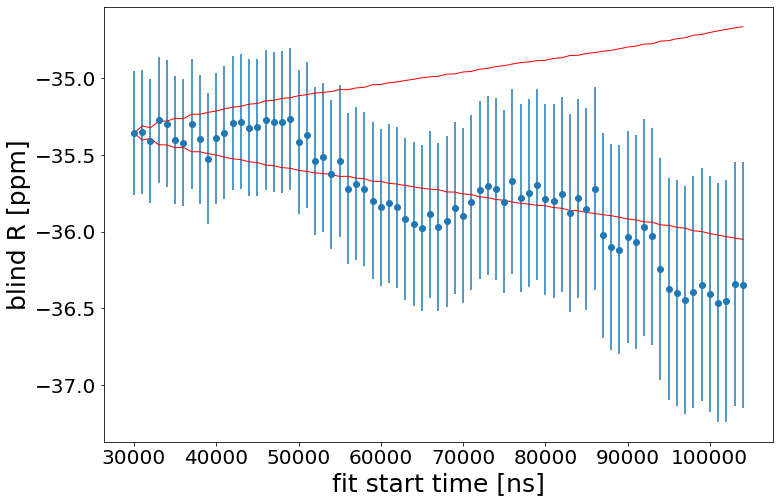

In [14]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(fit_st, rval, yerr=drval, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=25)
plt.ylabel("blind R [ppm]",fontsize=25)
plt.plot(fit_st, kband2p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband2m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False
plt.show()

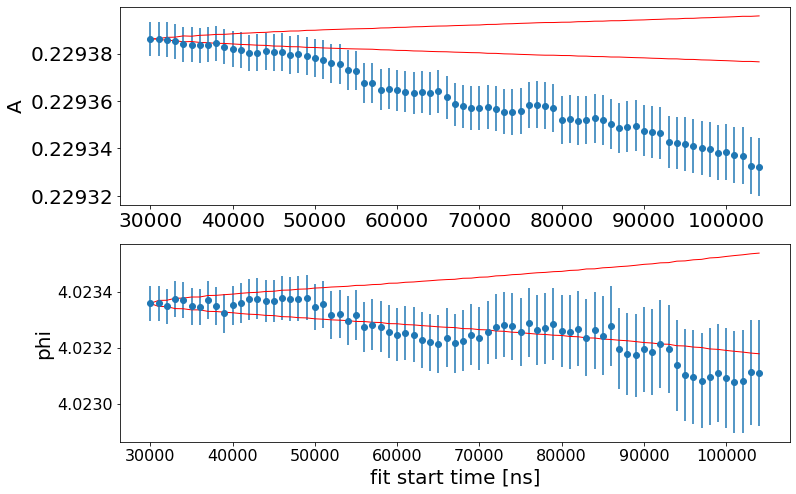

In [15]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, asym, yerr=dasym, fmt="o")
plt.ylabel("A",fontsize=20)
plt.plot(fit_st, kband1p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband1m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, phi, yerr=dphi, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("phi",fontsize=20)
plt.plot(fit_st, kband3p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband3m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

plt.show()

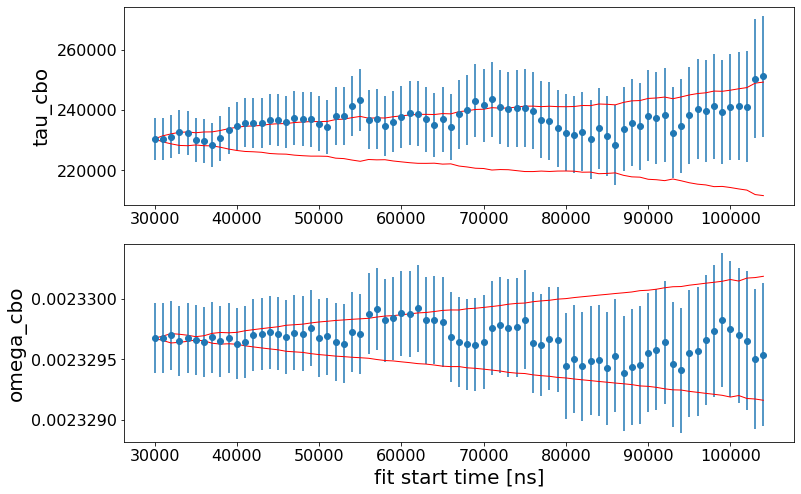

In [16]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, tau_cbo, yerr=dtau_cbo, fmt="o")
plt.ylabel("tau_cbo",fontsize=20)
plt.plot(fit_st, kband5p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband5m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, omega_cbo, yerr=domega_cbo, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("omega_cbo",fontsize=20)
plt.plot(fit_st, kband6p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband6m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

plt.show()

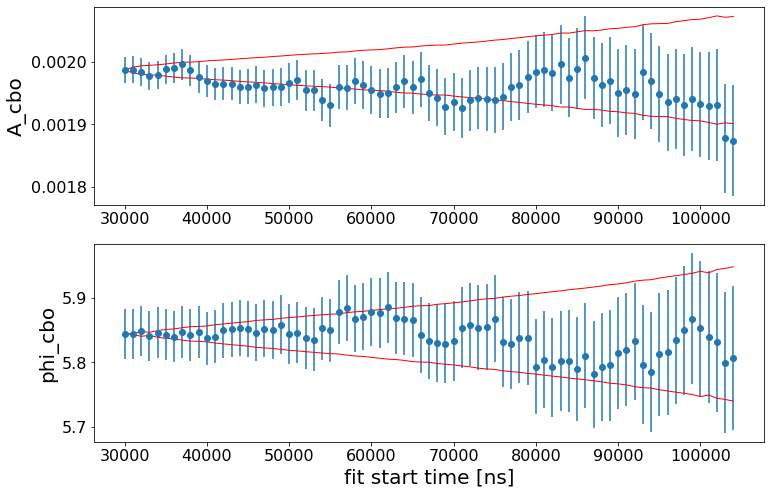

In [17]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, A_cbo, yerr=dA_cbo, fmt="o")
plt.ylabel("A_cbo",fontsize=20)
plt.plot(fit_st, kband4p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband4m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, phi_cbo, yerr=dphi_cbo, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("phi_cbo",fontsize=20)
plt.plot(fit_st, kband7p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband7m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

plt.show()

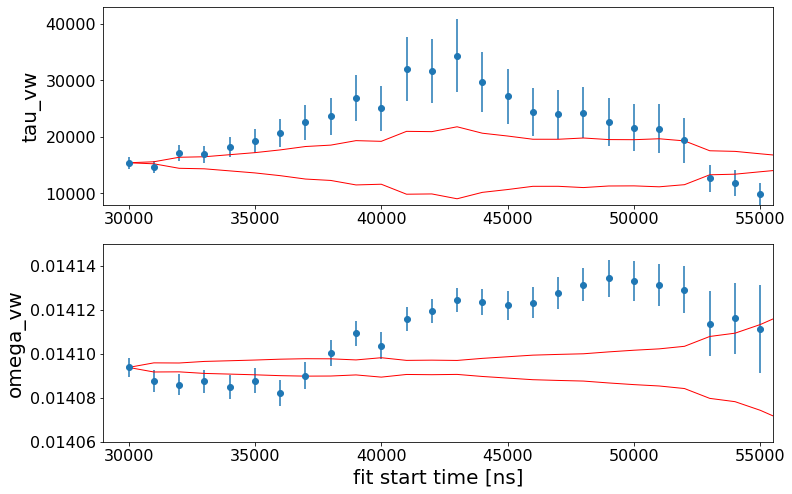

In [18]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, tau_vw, yerr=dtau_vw, fmt="o")
plt.ylabel("tau_vw",fontsize=20)
plt.plot(fit_st, kband13p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband13m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False
plt.xlim(29000,55500)
plt.ylim(8000,43000)

plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, omega_vw, yerr=domega_vw, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("omega_vw",fontsize=20)
plt.plot(fit_st, kband14p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband14m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False
plt.xlim(29000,55500)
plt.ylim(0.01406,0.01415)

plt.show()


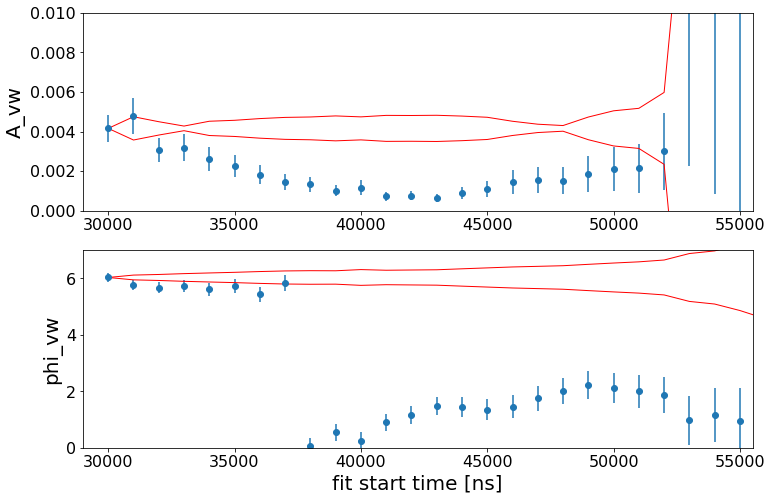

In [19]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, A_vw, yerr=dA_vw, fmt="o")
plt.ylabel("A_vw",fontsize=20)
plt.plot(fit_st, kband12p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband12m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False
plt.xlim(29000,55500)
plt.ylim(0,0.01)

plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, phi_vw, yerr=dphi_vw, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("phi_vw",fontsize=20)
plt.plot(fit_st, kband15p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband15m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False
plt.xlim(29000,55500)
plt.ylim(0,7)

plt.show()

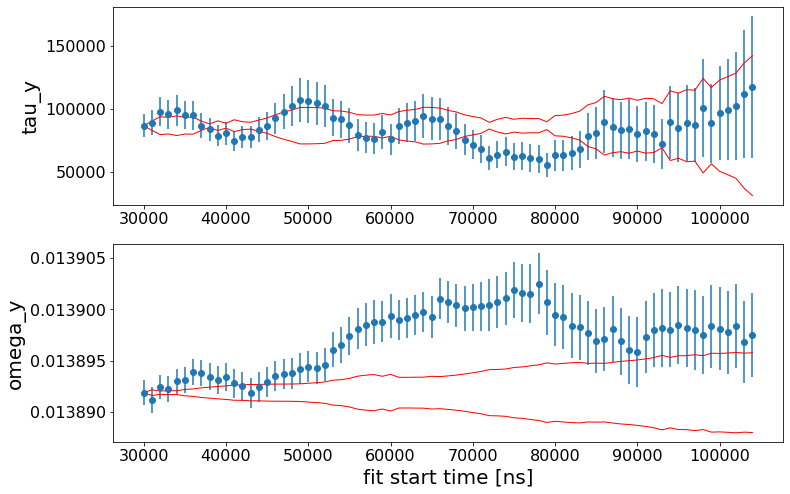

In [20]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, tau_y, yerr=dtau_y, fmt="o")
plt.ylabel("tau_y",fontsize=20)
plt.plot(fit_st, kband17p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband17m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, omega_y, yerr=domega_y, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("omega_y",fontsize=20)
plt.plot(fit_st, kband18p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband18m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

plt.show()


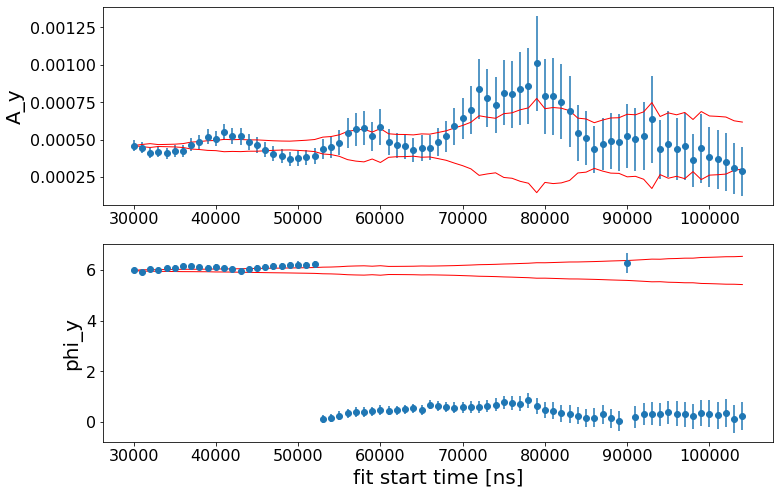

In [21]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, A_y, yerr=dA_y, fmt="o")
plt.ylabel("A_y",fontsize=20)
plt.plot(fit_st, kband16p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband16m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, phi_y, yerr=dphi_y, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("phi_y",fontsize=20)
plt.plot(fit_st, kband19p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband19m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

plt.show()